In [26]:
# This is only needed if the notebook is run in VSCode
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

# MDS (Multidimensional Scaling)

In [16]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from fastcore.all import *
from tsai.basics import *
import wandb
from dvats.all import *
wandb_api = wandb.Api()

In [17]:
config = AttrDict(
    input_artifact = 'vrodriguezf90/deepvats/toy:v0',
    w = 30, # ABP
    stride = 5
)

In [18]:
sw = SlidingWindow(window_len=config.w, stride=config.stride, get_y=[])

In [19]:
input_artifact = wandb_api.artifact(config.input_artifact)
df = input_artifact.to_df()
X, _ = sw(df)
df.shape, X.shape

wandb:   1 of 1 files downloaded.  


((550, 3), (105, 3, 30))

In [20]:
n_samples, n_features, n_n_steps = X.shape
# Initialize the dissimilarity matrix
dissimilarity_matrix = np.zeros((n_samples, n_samples))

# Iterate through each time step
for t in range(n_n_steps):
    # Extract data for the current time step
    X_t = X[:, :, t]

    # Compute pairwise Euclidean distances for the current time step
    distances_t = pairwise_distances(X_t, metric='euclidean')

    # Accumulate the distances
    dissimilarity_matrix += distances_t

# Average the distances across time steps
dissimilarity_matrix /= n_n_steps
dissimilarity_matrix.shape

(105, 105)

In [11]:
embedding = MDS(n_components=2, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(dissimilarity_matrix)
X_transformed.shape

(105, 2)

In [10]:
%matplotlib notebook

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(X_transformed[:,0], X_transformed[:,1], marker='o', facecolors='none', edgecolors='r', alpha=0.3)
# Line with grey color
ax.plot(X_transformed[:,0], X_transformed[:,1], alpha=0.5, picker=1, color='grey')
# Remove the ticks
ax.set_xticks([])
ax.set_yticks([])

<IPython.core.display.Javascript object>

[]

11

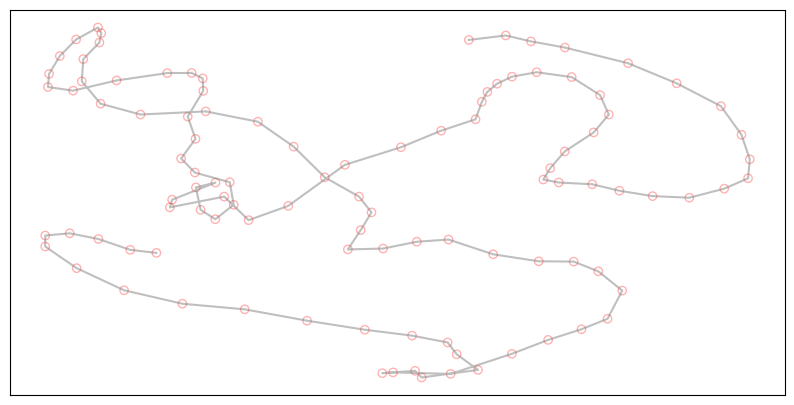

In [28]:
# Make the same plot as before, but interactive, to be used within a Jupyter notebook
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(X_transformed[:,0], X_transformed[:,1], marker='o', facecolors='none', edgecolors='r', alpha=0.3)
# Line with grey color
ax.plot(X_transformed[:,0], X_transformed[:,1], alpha=0.5, picker=1, color='grey')
# Remove the ticks
ax.set_xticks([])
ax.set_yticks([])
# Add a callback function to be called when the user clicks on the plot
fig.canvas.mpl_connect('pick_event', lambda event: print(event.ind))